In [2]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict the house pricing

# Load the data

In [3]:
#input
df = pd.read_csv('data/house_pricing.csv')
print(df.columns)
print(df.shape)
df.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'walking_score',
       'transit_score', 'bike_score', 'median_income', 'mean_income',
       'population'],
      dtype='object')
(21165, 27)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,walking_score,transit_score,bike_score,median_income,mean_income,population
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,47.5112,-122.257,1340,5650,24,46.0,22.0,55777.0,65498.0,24092
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,47.7210,-122.319,1690,7639,67,59.0,64.0,47910.0,60487.0,30826
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,47.7379,-122.233,2720,8062,14,36.0,NaN,86310.0,100546.0,20419
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,47.5208,-122.393,1360,5000,74,48.0,51.0,77761.0,95355.0,14770
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,47.6168,-122.045,1800,7503,9,0.0,NaN,134159.0,157543.0,25748


# Feature Engineering 

In [6]:
# TODO: create 2 new features


In [4]:
df_zipcode = pd.get_dummies(df['zipcode'])
df_zipcode

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df = pd.concat([df, df_zipcode], axis = 1)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# TODO: select the features and the target
X_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'] + list(df_zipcode.columns)
y_column = ['price']

# Model Training

In [25]:
# TODO: split the data: 80% for training and 20% for test
threshold = 0.8
line_threshold = int(0.8*len(df))
print(int(0.8*len(df)))



16932


In [26]:
x_train = df.ix[:line_threshold, X_columns]
y_train = df.ix[:line_threshold, y_column]

x_test = df.ix[line_threshold:, X_columns]
y_test = df.ix[line_threshold:, y_column]

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (16933, 74)
y_train (16933, 1)
x_test (4233, 74)
y_test (4233, 1)


In [28]:
# TODO: train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [14]:
# identigy the feature importance
# importance = []
# for i in range(len(X_columns)):
#     importance.append([X_columns[i], model.feature_importances_[i]])
# pd.DataFrame(importance).sort_values(by=1, ascending=False)

# Model Evaluation

In [30]:
# TODO: evaluate the model using the Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print('MAE', mean_absolute_error(y_test, y_pred))

MAE 90164.1856193948


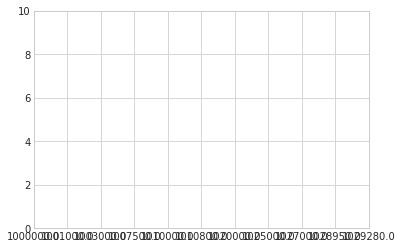

In [35]:
# plot the results
# plt.scatter(y_test, y_pred, alpha=0.3)
# plt.show()
plt.scatter(y_test, y_pred)
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()